In [1]:
#Importing libraries and loading dataset
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

org_col_names=["No", "year","month", "day", "hour", "pm2.5", "DEWP","TEMP", "PRES", "cbwd", "Iws", "Is", "Ir"]
col_names = ['pollution', 'dew', 'temp', 'pressure', 'w_dir', 'w_speed', 'snow', 'rain']

dataset = pd.read_csv('AirPollution.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])

In [2]:
dataset.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
# Data cleaning
dataset.drop('No', axis=1, inplace=True)
dataset.columns = col_names
dataset['pollution'].fillna(0, inplace=True)
dataset = dataset[24:] # drop the first day
print(dataset.head(5))
dataset.to_csv('pollution.csv') # save new CSV

                     pollution  dew  temp  pressure w_dir  w_speed  snow  rain
year_month_day_hour                                                           
2010-01-02 00:00:00      129.0  -16  -4.0    1020.0    SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0    1020.0    SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0    1021.0    SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0    1022.0    SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0    1022.0    SE     6.25     2     0


In [4]:
# load dataset
df = pd.read_csv('pollution.csv', header=0, index_col=0)
df.describe()

,pollution,dew,temp,pressure,w_speed,snow,rain
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,94.013516,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023
std,92.252276,14.429326,12.193384,10.271411,50.022729,0.760582,1.416247
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,24.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,68.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,132.250000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [5]:
dataset_columns = df.columns.tolist()
dataset_columns

['pollution', 'dew', 'temp', 'pressure', 'w_dir', 'w_speed', 'snow', 'rain']

<Axes: >

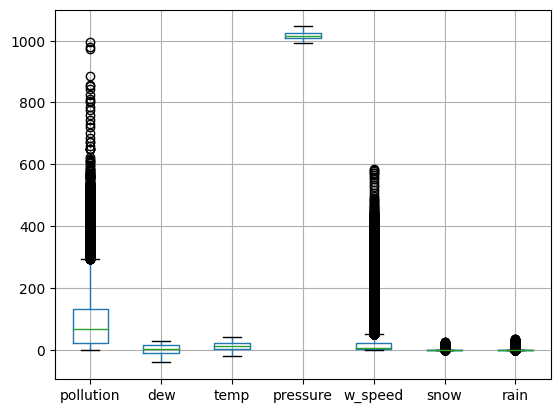

In [6]:
#Box plot
#pd.options.display.mpl_style = False
df.boxplot()

In [7]:
df

,pollution,dew,temp,pressure,w_dir,w_speed,snow,rain
year_month_day_hour,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


<ipython-input-8-7b71bec14500>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


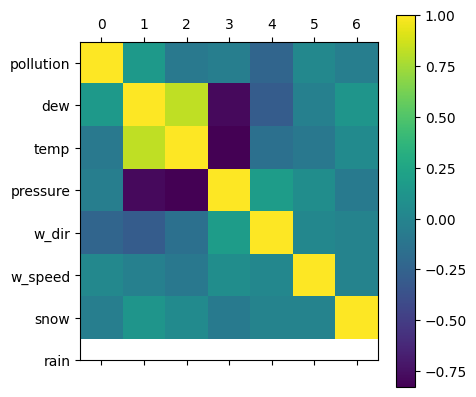

In [8]:
#Analysing relationship between different features
# cor_cols = ['pollution', 'wnd_spd', 'rain', 'snow', 'temp']
cor_cols = dataset_columns
plt.matshow(df.corr())
plt.yticks(range(len(cor_cols)), cor_cols)
plt.colorbar()
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = df.values
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')
values[:,4]

array([2., 2., 2., ..., 1., 1., 1.], dtype=float32)

In [10]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [11]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])

  return X,Y

In [12]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)


Y (43796, 1)
X (43796, 4, 8)


In [13]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (35036, 4, 8)
X_test (8760, 4, 8)
Y_train (35036, 1)
Y_test (8760, 1)


In [ ]:
pip install attention

In [19]:
#Importing LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM

from tensorflow import keras # for building Neural Networks
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Bidirectional, GRU, RepeatVector, Dense, TimeDistributed # for creating layers inside the Neural Network

# Data manipulation
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

# Sklearn
import sklearn
from sklearn.preprocessing import MinMaxScaler # for feature scaling

# Visualization
import plotly
import plotly.express as px
import plotly.graph_objects as go
from keras.layers import Dense, Dropout,LSTM


# Importing Attention Model
from attention import Attention

model = Sequential([
      #Bidirectional(LSTM(units=100,input_shape=(None, 2), return_sequences=True)),
      GRU(units = 64, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])),
      Dropout(0.2),

      GRU(units = 32, return_sequences = True),
      Dropout(0.2),

      LSTM(units=32, return_sequences=True),
      Dropout(0.2),

      LSTM(units=16,return_sequences=True),
      Dropout(0.2),

      Attention(),

      Dense(units = 64),
      Dense(units = 32),
      Dense(units = 16),
      Dense(units = 1),
])

##### Step 4 - Compile the model
model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['MeanSquaredError', 'MeanAbsoluteError'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance.
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )

pandas: 1.5.3
numpy: 1.23.5
sklearn: 1.2.2
plotly: 5.15.0


In [21]:
#Train the model
import tensorflow as tf
model.fit(X_train, Y_train, epochs = 40, batch_size = 32)

Epoch 1/40
1095/1095 [==============================] - 14s 13ms/step - loss: 7.6984e-04 - mean_squared_error: 7.6984e-04 - mean_absolute_error: 0.0162
Epoch 2/40
1095/1095 [==============================] - 12s 11ms/step - loss: 7.6099e-04 - mean_squared_error: 7.6099e-04 - mean_absolute_error: 0.0162
Epoch 3/40
1095/1095 [==============================] - 11s 10ms/step - loss: 7.5643e-04 - mean_squared_error: 7.5643e-04 - mean_absolute_error: 0.0162
Epoch 4/40
1095/1095 [==============================] - 11s 10ms/step - loss: 7.4917e-04 - mean_squared_error: 7.4917e-04 - mean_absolute_error: 0.0161
Epoch 5/40
1095/1095 [==============================] - 13s 11ms/step - loss: 7.5177e-04 - mean_squared_error: 7.5177e-04 - mean_absolute_error: 0.0160
Epoch 6/40
1095/1095 [==============================] - 11s 10ms/step - loss: 7.4531e-04 - mean_squared_error: 7.4531e-04 - mean_absolute_error: 0.0161
Epoch 7/40
1095/1095 [==============================] - 11s 10ms/step - loss: 7.6365e-04

In [22]:
#Taking predictions
from keras.models import load_model
model.save('AirPollutionMultivariate.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
Y_pred = model.predict(X_test)
print(Y_pred.shape)

274/274 [==============================] - 2s 4ms/step
(8760, 1)


In [24]:
Y_pred = model.predict(X_test)

274/274 [==============================] - 1s 4ms/step


In [25]:
#Y_predicted = scaler.inverse_transform(Y_pred)
print('y_predicted',Y_pred.shape)
#print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', scaled_dataset.shape)

y_predicted (8760, 1)
X_test (8760, 4, 8)
scaled Values shape (43800, 8)


In [26]:
#Scaling back to the original scale
d = scaled_dataset[:8760,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:8760,1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:8760,1:]), axis = 1)
print('concat Y_test', Y_test.shape)

dummy (8760, 8)
Y_pred (8760, 1)
concat y_pred (8760, 1)
concat Y_test (8760, 1)


In [27]:
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (8760, 1)
Y_predicted (8760, 1)


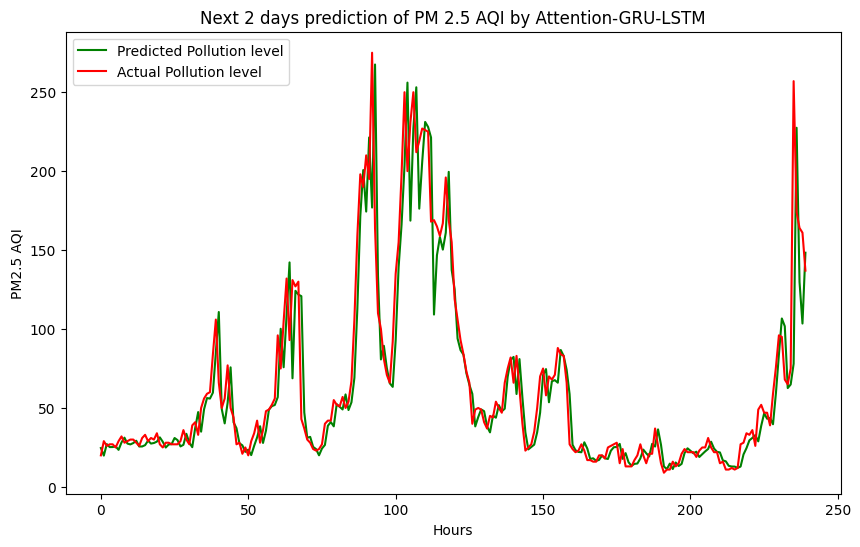

<Figure size 640x480 with 0 Axes>

In [28]:
#Plot the graph between actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(Y_predicted[50:290,:], color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested[50:290,:] , color = 'red',label = 'Actual Pollution level')
plt.title("Next 2 days prediction of PM 2.5 AQI by Attention-GRU-LSTM")
plt.xlabel("Hours")
plt.ylabel("PM2.5 AQI")
plt.legend()
plt.show()
plt.savefig('graph1.png')

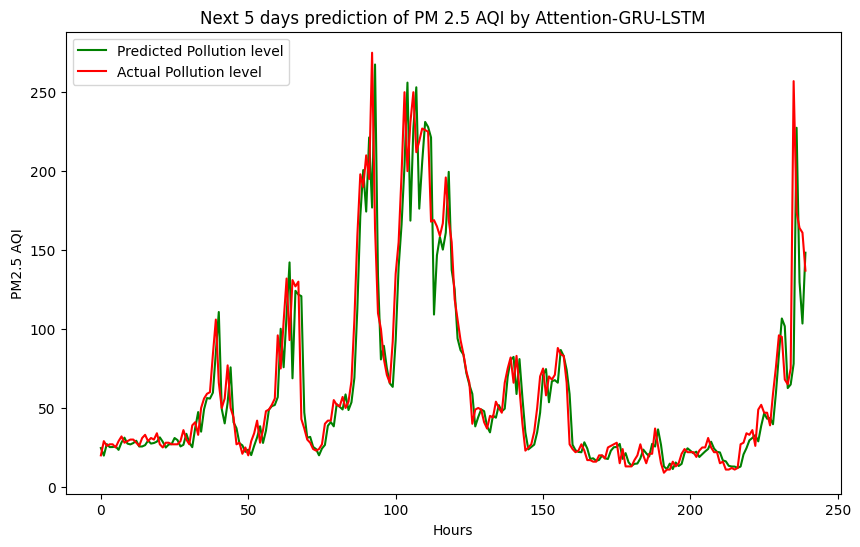

<Figure size 640x480 with 0 Axes>

In [29]:
#Plot the graph between actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(Y_predicted[50:290,:], color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested[50:290,:] , color = 'red',label = 'Actual Pollution level')
plt.title("Next 5 days prediction of PM 2.5 AQI by Attention-GRU-LSTM")
plt.xlabel("Hours")
plt.ylabel("PM2.5 AQI")
plt.legend()
plt.show()
plt.savefig('graph2.png')

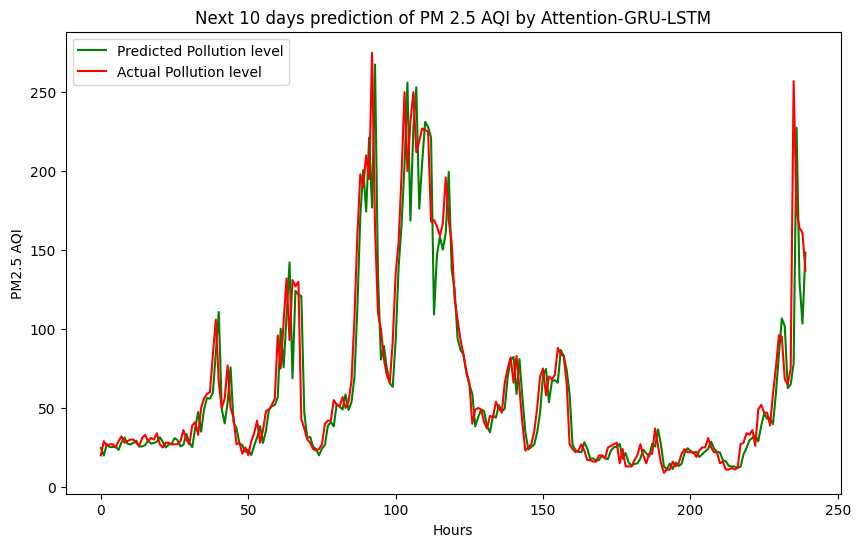

<Figure size 640x480 with 0 Axes>

In [30]:
#Plot the graph between actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(Y_predicted[50:290,:], color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested[50:290,:] , color = 'red',label = 'Actual Pollution level')
plt.title("Next 10 days prediction of PM 2.5 AQI by Attention-GRU-LSTM")
plt.xlabel("Hours")
plt.ylabel("PM2.5 AQI")
plt.legend()
plt.show()
plt.savefig('graph3.png')

In [31]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [32]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

mse = mean_squared_error(Y_tested, Y_predicted)
print('MSE', mse)
print('RMSE' , np.sqrt(mse))
print("Mean of Test data ", np.mean(Y_tested))

MSE 787.0574
RMSE 28.054543
Mean of Test data  96.041435


In [33]:
MAPE = mean_absolute_percentage_error(Y_tested[50:98,:], Y_predicted[50:98,:])
MAE = metrics.mean_absolute_error(Y_tested[50:98,:], Y_predicted[50:98,:])
MSE = metrics.mean_squared_error(Y_tested[50:98,:], Y_predicted[50:98,:])
RMSE = np.sqrt(metrics.mean_squared_error(Y_tested[50:98,:], Y_predicted[50:98,:]))
R2 = r2_score(Y_tested[50:98,:], Y_predicted[50:98,:])

MAPE5 = mean_absolute_percentage_error(Y_tested[50:170,:], Y_predicted[50:170,:])
MAE5 = metrics.mean_absolute_error(Y_tested[50:170,:], Y_predicted[50:170,:])
MSE5 = metrics.mean_squared_error(Y_tested[50:170,:], Y_predicted[50:170,:])
RMSE5 = np.sqrt(metrics.mean_squared_error(Y_tested[50:170,:], Y_predicted[50:170,:]))
R2_5 = r2_score(Y_tested[50:170,:], Y_predicted[50:170,:])

MAPE10 = mean_absolute_percentage_error(Y_tested[50:290,:], Y_predicted[50:290,:])
MAE10 = metrics.mean_absolute_error(Y_tested[50:290,:], Y_predicted[50:290,:])
MSE10 = metrics.mean_squared_error(Y_tested[50:290,:], Y_predicted[50:290,:])
RMSE10 = np.sqrt(metrics.mean_squared_error(Y_tested[50:290,:], Y_predicted[50:290,:]))
R2_10 = r2_score(Y_tested[50:290,:], Y_predicted[50:290,:])

MAPE_C = mean_absolute_percentage_error(Y_tested, Y_predicted)
MAE_C = metrics.mean_absolute_error(Y_tested, Y_predicted)
MSE_C = metrics.mean_squared_error(Y_tested, Y_predicted)
RMSE_C = np.sqrt(metrics.mean_squared_error(Y_tested, Y_predicted))
R2_C = r2_score(Y_tested, Y_predicted)

In [34]:
Best_Model ={
    'Model':['Attention GRU LSTM 2 Days', 'Attention GRU LSTM 5 Days', 'Attention GRU LSTM 10 Days', 'Attention GRU LSTM Complete'],
        'R2_Score':[R2, R2_5, R2_10, R2_C],
        'RMSE':[RMSE, RMSE5, RMSE10, RMSE_C],
        'MSE':[MSE, MSE5, MSE10, MSE_C],
        'MAE':[MAE, MAE5, MAE10,MAE_C]
        # 'MAPE':[MAPE/1e15]}
}
Best_Model =pd.DataFrame(Best_Model)
Best_Model=Best_Model.set_index('Model')
Best_Model

,R2_Score,RMSE,MSE,MAE
Model,,,,
Attention GRU LSTM 2 Days,0.595341,11.008683,121.191101,6.869022
Attention GRU LSTM 5 Days,0.859698,25.515234,651.027161,15.893106
Attention GRU LSTM 10 Days,0.842374,23.105165,533.848633,12.567484
Attention GRU LSTM Complete,0.908785,28.054543,787.057373,14.831964
